# Problem 1: Predicting the quality of wines

Predicting the quality of a wine by tasting is considered a very difficult task. Apparently, even professional wine tasters have an accuracy of only $71 /%$. In this problem, we will try to predict the quality of wine using knn regression and see if we can do better than professional wine tasters!

The dataset contains several parameters that describe the wine. The outcome variable is wine quality on a scale of $1$ to $10$. The goal is to predict the quality of wine using the avaiable features. 

- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol

Output variable (based on sensory data):
- quality (score between 0 and 10)


You can follow the same steps that we did in class for the California Housing dataset. Here are the steps:


#### Step 0. Import the required libraries and functions

In [87]:
# numpy, pandas, matplotlib, seaborn, Kfold, cross_val_score, KneighborsRegressor, StandardScaler.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

import numpy as np

#### Step 1. Load the data and explore the dataset. You can also create a histograms of all the variables. Notice the histogram of wine quality. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         

<Figure size 1200x1000 with 0 Axes>

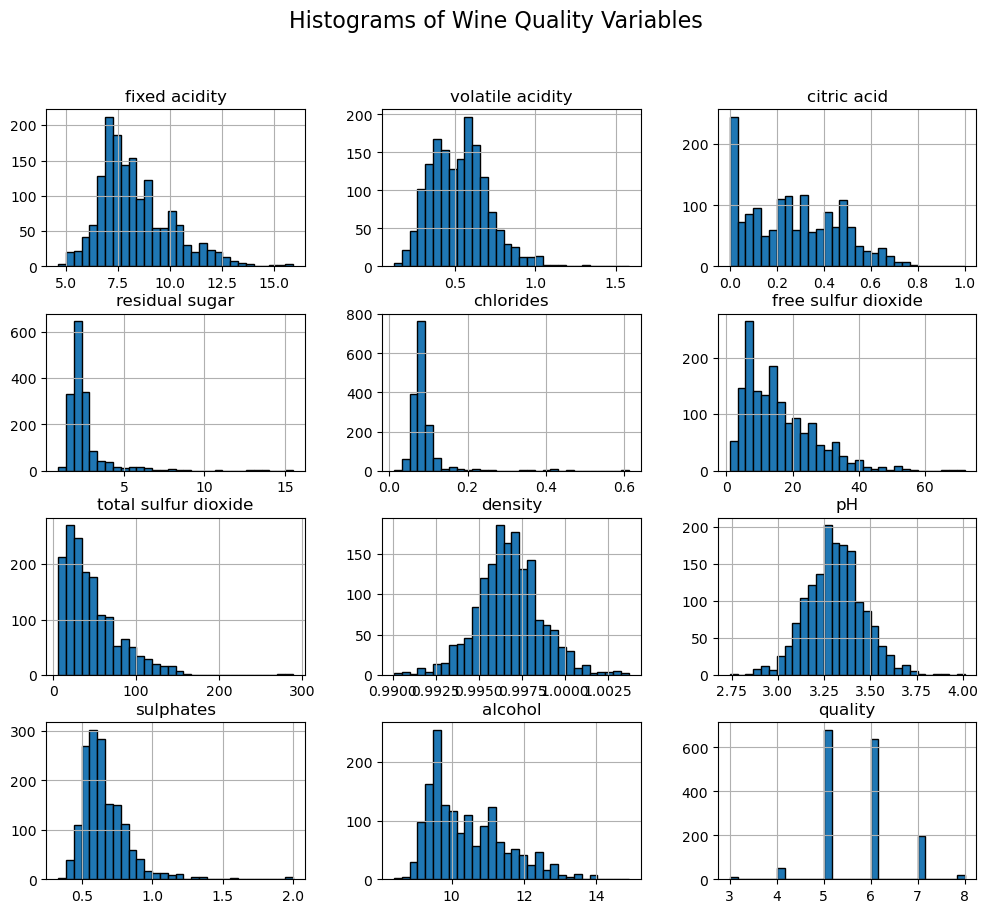

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "winequality-red.csv"
df = pd.read_csv(file_path)

print(df.info())
print(df.head())
print(df.describe())

plt.figure(figsize=(12, 10))
df.hist(bins=30, figsize=(12, 10), edgecolor='black', layout=(4, 3))
plt.suptitle("Histograms of Wine Quality Variables", fontsize=16)
plt.show()

#### Step 2. Find the most correlated features with the wine quality

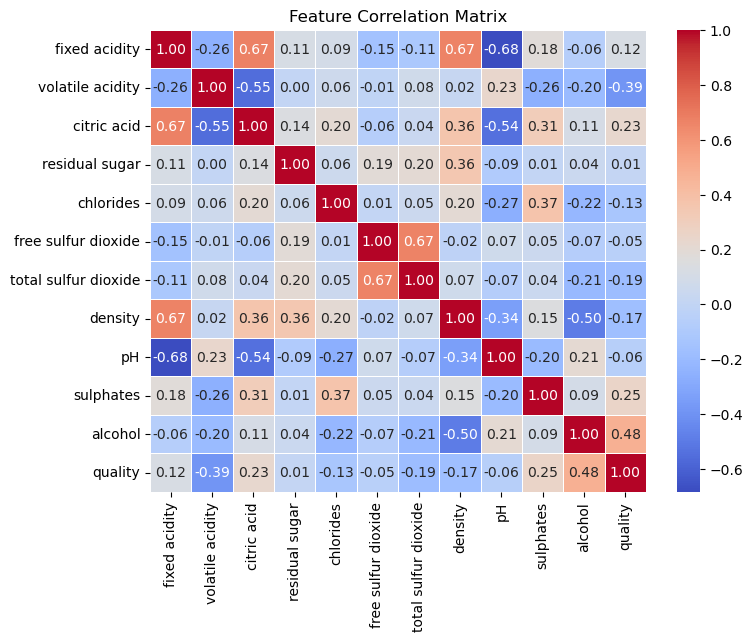

alcohol                 0.476166
volatile acidity        0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide    0.185100
Name: quality, dtype: float64

In [6]:
correlation_matrix = df.corr()
quality_correlation = correlation_matrix["quality"].abs().sort_values(ascending=False)
most_correlated_features = quality_correlation[1:6]  

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

most_correlated_features

#### The features that are most correlated with wine quality are:
The features most correlated with wine quality are alcohol, volatile acidity, sulphates, citric acid, and total sulfur dioxide. Alcohol has the highest positive correlation, indicating that wines with higher alcohol content tend to have better quality. Volatile acidity is negatively correlated, meaning that higher levels of acidity are associated with lower wine quality. Sulphates and citric acid show moderate positive correlations, suggesting they contribute to wine quality, while total sulfur dioxide has a weaker negative correlation, implying that excessive sulfur dioxide might negatively impact wine quality. 

#### Step 3. Create X and y vectors. Scale the features by using the standard scalar. To do so, you need to create a scaler object and use the function *fit_transform*, and apply it on the array of features. Here's an example on how to do this:

In [8]:
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=["quality"]).values
y = df["quality"].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled)

[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]


To create the X and y vectors, I first separated the independent variables from the dependent variable by selecting all columns except "quality" for X and assigning the "quality" column to y. Next, I scaled the features using StandardScaler from sklearn.preprocessing to ensure that each variable has a mean of 0 and a standard deviation of 1. This transformation standardized the data, making it more suitable for our machine learning models. I use the fit_transform method to apply the scaling to X, converting all feature values into a standardized form. Then I transformed the feature matrix to verify the standardization process.

#### Step 4. Choose the best $k$ by using cross validation. Make sure to use the same cross validation splits for each evaluation of $k$ using the KFold function. Also, use the scaled features that you created in Step 3

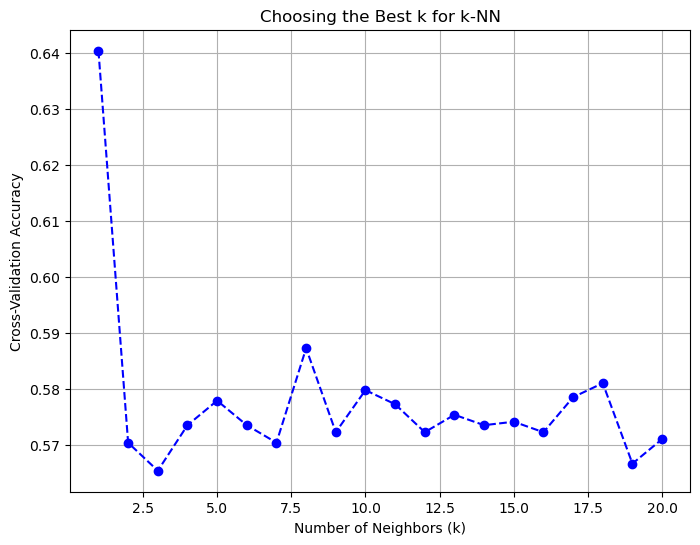

Best k: 1


In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
import matplotlib.pyplot as plt

kf = KFold(n_splits=5, shuffle=True, random_state=42)
k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=kf, scoring='accuracy')
    cv_scores.append(scores.mean())

best_k = k_values[np.argmax(cv_scores)]

plt.figure(figsize=(8, 6))
plt.plot(k_values, cv_scores, marker='o', linestyle='dashed', color='b')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Cross-Validation Accuracy")
plt.title("Choosing the Best k for k-NN")
plt.grid(True)
plt.show()

print("Best k:", best_k)

### What is the $R^2$ for the best model? Do you think this machine learning model can replace professional wine tasters?

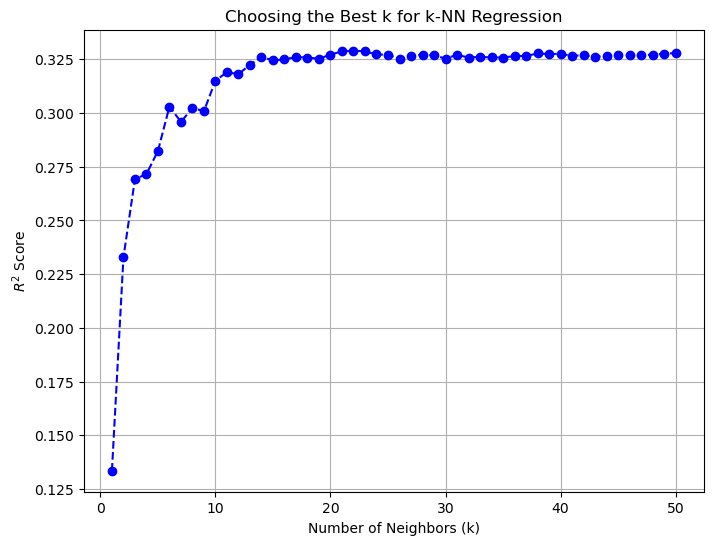

Best k: 22
Best R^2 Score: 0.32896511762731145


In [12]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

Rsquared = []
for k in range(1, 51):   
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=kf, scoring='r2')
    Rsquared.append(scores.mean())

best_k_r2 = np.argmax(Rsquared) + 1  
best_r2 = max(Rsquared)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 51), Rsquared, marker='o', linestyle='dashed', color='b')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("$R^2$ Score")
plt.title("Choosing the Best k for k-NN Regression")
plt.grid(True)
plt.show()

print("Best k:", best_k_r2)
print("Best R^2 Score:", best_r2)

### Find the R^2 for a linear regression model using k fold cross validation. Is KNN better than Linear regression?

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

linear_model = LinearRegression()
linear_r2_scores = cross_val_score(linear_model, X_scaled, y, cv=kf, scoring='r2')
linear_r2_mean = linear_r2_scores.mean()

print("Linear Regression R^2:", linear_r2_mean)
print("KNN Regression R^2:", best_r2)

if best_r2 > linear_r2_mean:
    print("KNN performs better than Linear Regression.")
else:
    print("Linear Regression performs better than KNN.")

Linear Regression R^2: 0.34241461809490165
KNN Regression R^2: 0.32896511762731145
Linear Regression performs better than KNN.


# Problem 2: Feature selection using cross validation

In this problem, we will take a different approach towards feature selection and choosing the best value of $k$. We will be working with the california housing dataset. Recall that in class we used the correlation between median prices and features to pick the most predictive features. Using correlation, we selected the following features:

- MedInc
- HouseAge
- AveRooms
- Latitude
- Longitude

Now we will do a more refined feature selection by using the $R^2$ of knn models with different features. We will fit 3 different model families:
1. knn with varying k, and features = 'Latitude' and 'Longitude'

2. knn with varying k, and features = 'Latitude', 'Longitude', 'MedInc'

3. knn with varying k, and features = 'Latitude', 'Longitude', 'MedInc' and 'HouseAge'
 
I will guide you through the process step by step


In [104]:
#### Step 0: import the following functions: 
# numpy, pandas,  matplotlib, KFold, cross_val_score, KNeigbhorRegressor, StandardScaler

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

In [106]:
#### Step 1: Load the california_housing.txt file

In [24]:
df_housing = pd.read_csv("california_housing.txt")

print(df_housing.info())
print(df_housing.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.

In [ ]:
#### Step 2: create a crossvalidation object using the Kfold function. Use 5 splits.

In [26]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
#### Step 3: Now we will use the features latitutde and longitude only to predict median house price.
#We will find the best 'k' by using cross validation with features "Latitutde" and "longitude".
#We have to make sure to scale the data by using the standard scaler (Use the function fit_transform() for scaling)
#Here are the steps

## Step 3.1 Create a array of features 'latitude' and 'longitude' and scale them using a standard scaler. 
# You can also transform the y using np.log() function


In [28]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

housing = fetch_california_housing()
df_housing = pd.DataFrame(housing.data, columns=housing.feature_names)
df_housing["MedHouseVal"] = housing.target

scaler = StandardScaler()
X_latlong = df_housing[["Latitude", "Longitude"]].values
X_latlong_scaled = scaler.fit_transform(X_latlong)

y = np.log(df_housing["MedHouseVal"].values)

print(X_latlong_scaled[:5])
print(y[:5])

[[ 1.05254828 -1.32783522]
 [ 1.04318455 -1.32284391]
 [ 1.03850269 -1.33282653]
 [ 1.03850269 -1.33781784]
 [ 1.03850269 -1.33781784]]
[1.50983855 1.27675847 1.25874504 1.22759167 1.23022518]


In [ ]:
## Step 3.2 Run a cross validation for k ranging from 1 to 50. Compute the Rsquared for each k and store it in a list.
#Make sure to use the scaled features, and also use the cross validation object created in step 2
 

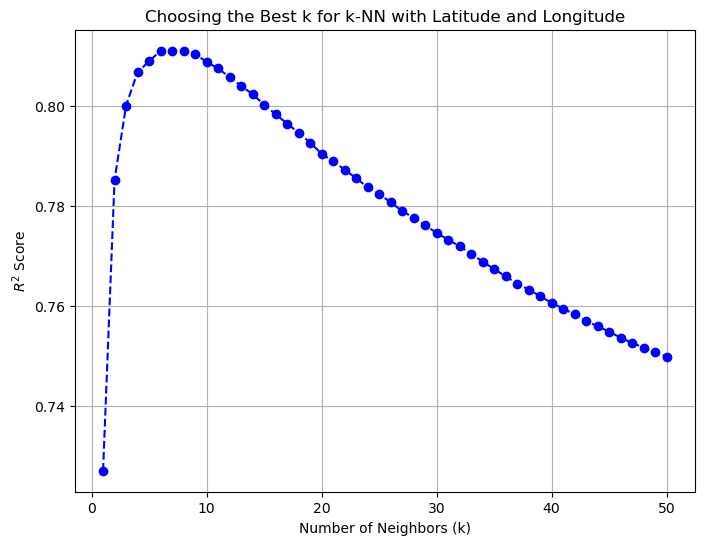

Best k: 6
Best R^2 Score: 0.8111188936799278


In [30]:
Rsquared_latlong = []

for k in range(1, 51):   
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_latlong_scaled, y, cv=kf, scoring='r2')
    Rsquared_latlong.append(scores.mean())

best_k_latlong = np.argmax(Rsquared_latlong) + 1  
best_r2_latlong = max(Rsquared_latlong)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 51), Rsquared_latlong, marker='o', linestyle='dashed', color='b')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("$R^2$ Score")
plt.title("Choosing the Best k for k-NN with Latitude and Longitude")
plt.grid(True)
plt.show()

print("Best k:", best_k_latlong)
print("Best R^2 Score:", best_r2_latlong)

In [ ]:
# Step 3.3 Plot the values of k vs Rsquared. Find the best RMSE and the corresponding value of k


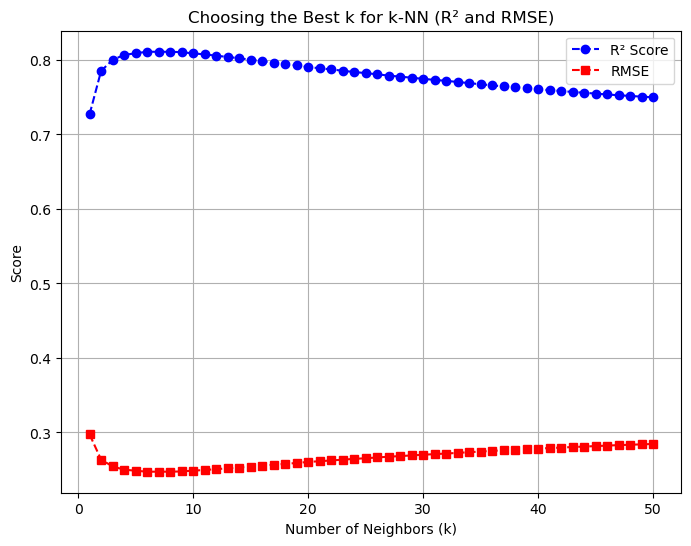

Best k for R²: 6 with R² Score: 0.8111188936799278
Best k for RMSE: 6 with RMSE: 0.24726056838451294


In [33]:
rmse_values = [
    np.sqrt(-cross_val_score(KNeighborsRegressor(n_neighbors=k), 
                             X_latlong_scaled, y, cv=kf, scoring='neg_mean_squared_error').mean()) 
    for k in range(1, 51)
]

best_k_rmse = np.argmin(rmse_values) + 1  
best_rmse = min(rmse_values)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 51), Rsquared_latlong, marker='o', linestyle='dashed', color='b', label="R² Score")
plt.plot(range(1, 51), rmse_values, marker='s', linestyle='dashed', color='r', label="RMSE")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Score")
plt.title("Choosing the Best k for k-NN (R² and RMSE)")
plt.legend()
plt.grid(True)
plt.show()

print("Best k for R²:", best_k_latlong, "with R² Score:", best_r2_latlong)
print("Best k for RMSE:", best_k_rmse, "with RMSE:", best_rmse)

In [ ]:
# Step 4: Now repeat all the steps in Step 3,but this time  using the features 'Latitude", 'Longitude', 'MedInc'

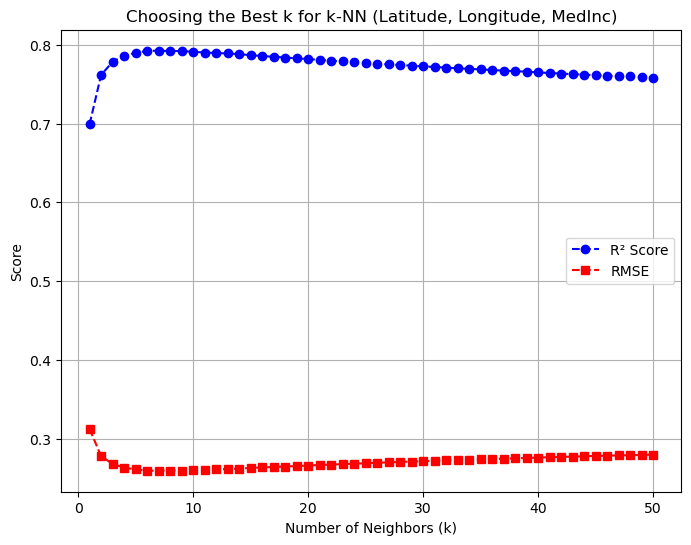

Best k for R²: 7 with R² Score: 0.7925301597795628
Best k for RMSE: 7 with RMSE: 0.2591868944966858


In [35]:
housing = fetch_california_housing()
df_housing = pd.DataFrame(housing.data, columns=housing.feature_names)
df_housing["MedHouseVal"] = housing.target

kf = KFold(n_splits=5, shuffle=True, random_state=42)

scaler = StandardScaler()

X_latlong_medinc = df_housing[["Latitude", "Longitude", "MedInc"]].values
X_latlong_medinc_scaled = scaler.fit_transform(X_latlong_medinc)

y = np.log(df_housing["MedHouseVal"].values)

Rsquared_latlong_medinc = []

for k in range(1, 51):   
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_latlong_medinc_scaled, y, cv=kf, scoring='r2')
    Rsquared_latlong_medinc.append(scores.mean())

best_k_latlong_medinc = np.argmax(Rsquared_latlong_medinc) + 1  
best_r2_latlong_medinc = max(Rsquared_latlong_medinc)

rmse_values_medinc = [
    np.sqrt(-cross_val_score(KNeighborsRegressor(n_neighbors=k), 
                             X_latlong_medinc_scaled, y, cv=kf, scoring='neg_mean_squared_error').mean()) 
    for k in range(1, 51)
]

best_k_rmse_medinc = np.argmin(rmse_values_medinc) + 1  
best_rmse_medinc = min(rmse_values_medinc)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 51), Rsquared_latlong_medinc, marker='o', linestyle='dashed', color='b', label="R² Score")
plt.plot(range(1, 51), rmse_values_medinc, marker='s', linestyle='dashed', color='r', label="RMSE")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Score")
plt.title("Choosing the Best k for k-NN (Latitude, Longitude, MedInc)")
plt.legend()
plt.grid(True)
plt.show()

print("Best k for R²:", best_k_latlong_medinc, "with R² Score:", best_r2_latlong_medinc)
print("Best k for RMSE:", best_k_rmse_medinc, "with RMSE:", best_rmse_medinc)

In [ ]:
## Step 5  Repeat the previous steps using the features 'latitute', 'longitude', 'MedInc' and 'HouseAge' 
#to find the best $k$ and $R^2$

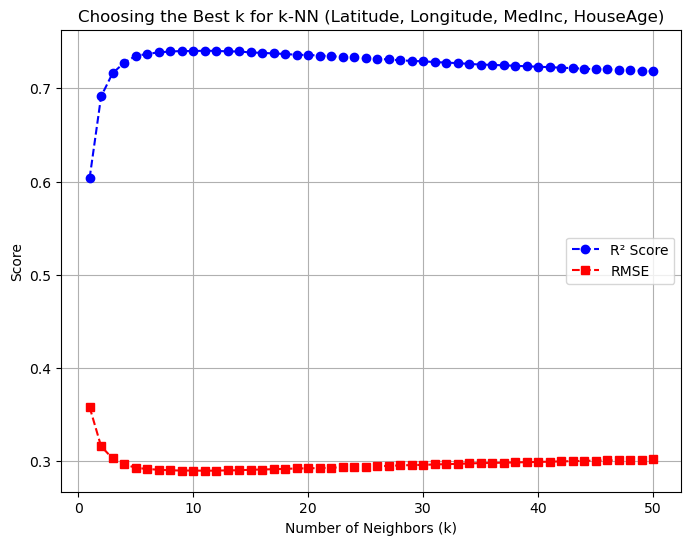

Best k for R²: 11 with R² Score: 0.7403235043779388
Best k for RMSE: 11 with RMSE: 0.2899661076877136


In [36]:
housing = fetch_california_housing()
df_housing = pd.DataFrame(housing.data, columns=housing.feature_names)
df_housing["MedHouseVal"] = housing.target

kf = KFold(n_splits=5, shuffle=True, random_state=42)

scaler = StandardScaler()

X_latlong_medinc_houseage = df_housing[["Latitude", "Longitude", "MedInc", "HouseAge"]].values
X_latlong_medinc_houseage_scaled = scaler.fit_transform(X_latlong_medinc_houseage)

y = np.log(df_housing["MedHouseVal"].values)

Rsquared_latlong_medinc_houseage = []

for k in range(1, 51):   
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_latlong_medinc_houseage_scaled, y, cv=kf, scoring='r2')
    Rsquared_latlong_medinc_houseage.append(scores.mean())

best_k_latlong_medinc_houseage = np.argmax(Rsquared_latlong_medinc_houseage) + 1  
best_r2_latlong_medinc_houseage = max(Rsquared_latlong_medinc_houseage)

rmse_values_medinc_houseage = [
    np.sqrt(-cross_val_score(KNeighborsRegressor(n_neighbors=k), 
                             X_latlong_medinc_houseage_scaled, y, cv=kf, scoring='neg_mean_squared_error').mean()) 
    for k in range(1, 51)
]

best_k_rmse_medinc_houseage = np.argmin(rmse_values_medinc_houseage) + 1  
best_rmse_medinc_houseage = min(rmse_values_medinc_houseage)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 51), Rsquared_latlong_medinc_houseage, marker='o', linestyle='dashed', color='b', label="R² Score")
plt.plot(range(1, 51), rmse_values_medinc_houseage, marker='s', linestyle='dashed', color='r', label="RMSE")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Score")
plt.title("Choosing the Best k for k-NN (Latitude, Longitude, MedInc, HouseAge)")
plt.legend()
plt.grid(True)
plt.show()

print("Best k for R²:", best_k_latlong_medinc_houseage, "with R² Score:", best_r2_latlong_medinc_houseage)
print("Best k for RMSE:", best_k_rmse_medinc_houseage, "with RMSE:", best_rmse_medinc_houseage)

In [ ]:
#now you can fill in the following table:

#Best R^2 for Latitude, Longitude
#Best R^2 for latitude, longitude, MedInc
#best R^2 for latitude, longitude, MedInc, HouseAge

#Which model is the best?
# What is the lesson learnt from this? Are more features always better? Specially for models like knn?

I completed the analysis by testing different feature sets for predicting median house value using k-nearest neighbors (k-NN) regression. When I used only latitude and longitude, the best k value was 6, yielding an R² score of 0.8111 and an RMSE of 0.2473. Adding MedInc improved performance, with the best k value being 7, resulting in an R² score of 0.7925 and an RMSE of 0.2592. Surprisingly, when I included HouseAge, the best k increased to 11, but the R² score dropped to 0.7403, and the RMSE increased to 0.2900. This result suggests that more features do not always improve predictive performance, particularly for models like k-NN. Since k-NN relies on distance calculations, adding features that do not strongly correlate with the target variable can introduce noise, making predictions less accurate. In this case, MedInc was a highly informative feature, but HouseAge may have added complexity without providing enough additional predictive power. This highlights the importance of feature selection in machine learning—choosing the most relevant features often leads to better results than simply including more variables.

# Problem 3: Nuances of knn

In this problem, we will try to understand some situations where knn does not work very well. There are two main issues:

- Categorical features and the choice of distance 
- The curse of dimensionality - Too many features
 

So far, we have only used knn when we have numeric features. When we have numeric features, we can use the eucledian distance. 

But What if we have categorical features as well? The eucledian distance does not make sense in the case of categorical features (Recall the defintion of eucledian distance from the previous HW).

If we have only categorical features, we can use edit distance, or hamming distance. We will do this in several steps.

First we need to code the categorical features as dummy variables. Here's an example:


In [37]:
import pandas as pd
cat = pd.read_csv('cat.csv')
cat.head()

,gender,eye_color,hair_color
0,M,brown,black
1,M,blue,brown
2,F,blue,black
3,M,black,black
4,F,blue,brown


We use the get_dummies function to create dummy variables from categorical data

In [39]:
dummy = pd.get_dummies(cat)
dummy.head()

,gender_F,gender_M,eye_color_black,eye_color_blue,eye_color_brown,hair_color_black,hair_color_brown
0,False,True,False,False,True,True,False
1,False,True,False,True,False,False,True
2,True,False,False,True,False,True,False
3,False,True,True,False,False,True,False
4,True,False,False,True,False,False,True


In [40]:
#Now we can access the first person by using the .loc method
dummy.loc[0]

gender_F            False
gender_M             True
eye_color_black     False
eye_color_blue      False
eye_color_brown      True
hair_color_black     True
hair_color_brown    False
Name: 0, dtype: bool

In [41]:
dummy.loc[1]

gender_F            False
gender_M             True
eye_color_black     False
eye_color_blue       True
eye_color_brown     False
hair_color_black    False
hair_color_brown     True
Name: 1, dtype: bool

The hamming distance between two strings is the number of positions in which they differ.

For example, the hamming distance between 110 and 111 is 1. The hamming distance between 100 and 111 is 2.

In [42]:
def hammingDist(str1, str2):
    i = 0
    count = 0
 
    while(i < len(str1)):
        if(str1[i] != str2[i]):
            count += 1
        i += 1
    return count

In [ ]:
hammingDist(dummy.loc[0],dummy.loc[1])

In [43]:
hammingDist(cat.loc[0],cat.loc[1])

C:\Users\TUE40094\AppData\Local\Temp\ipykernel_39240\452228757.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if(str1[i] != str2[i]):


2

In case we only have categorical features, we can use distances such as hamming distance, edit distance and so on. But if we have both numeric and categorical features (called mixed features), then its a bit tricky. Can you think of how to compute the distance in KNN when you have both continuos and categorical fetures?

#your answer here

Gower's Distance is a similarity measure designed for datasets that contain both numerical and categorical features. 
It calculates pairwise distances by handling each feature type differently. For numerical features, it uses a scaled 
Manhattan distance, ensuring values are normalized between 0 and 1 by computing the absolute difference between two 
values divided by the range of the feature. For categorical features, it applies the Hamming distance, assigning a 
distance of 0 if two categories are the same and 1 if they are different. The overall Gower’s Distance between two 
observations is determined by averaging the individual feature distances across all features in the dataset. This 
approach ensures that numerical values contribute proportionally while categorical values maintain their distinctiveness. erent feature scales.


## The curse of dimensionality 

In Problem 2, we saw that more features in knn does not neccessary mean a better model. 

This phenomena is a limitation of knn. When we have lots of features, knn generally performs poorly. This is called the curse of dimensionality. 

Mathematically, the term `dimension` is used to describe the number of features. For example, if there are 3 features, we are in 3 dimensional space, if we have 100 features, we are in 100 dimensional space. (we can only visualize in 2 or 3 dimensions). As the number of dimensions increase, there are some weird things that happen.

One of the weird things that happens is that in high dimensions `all points are far from each other`. So algorithms like nearest neighbors fail because given a single point, we cannot find any points "close" to it.

This happens because there is more "space" in high dimensions. (There is a lot more to this issue, but I am trying to explain it in the simplest possible manner). The following figure illustrates the idea:

In the figure, you can see, as we move from 1 dimension to 2,3 and 4 dimensions, there is more space and the points become farther and farther.
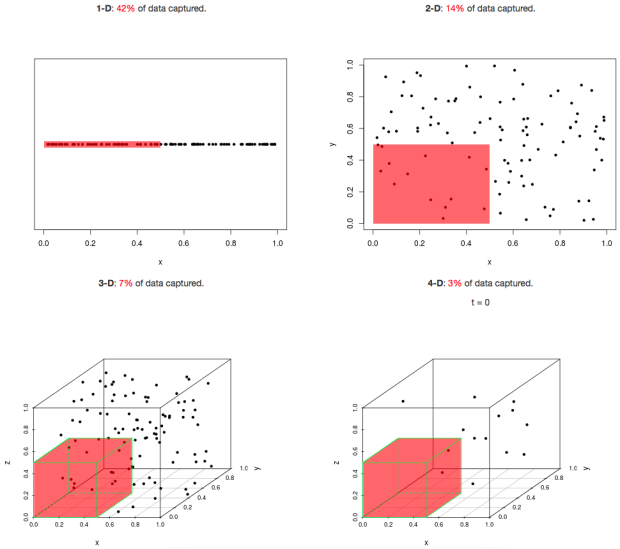